<a href="https://colab.research.google.com/github/AhmadMuhamadSolihin/Machine-Learning/blob/main/Perbandingan_SVR_dan_KNN_untuk_Peramalan_Harga_Saham_BBRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
print(sys.version)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


#IMPORT

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import yfinance as yf

from joblib import load
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer, mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

#DATA

In [ ]:
data = yf.download("BBRI.JK", start="2020-01-01", end="2024-12-31")
print(data.head())

data.to_csv('BBRI(JK).csv')

/tmp/ipython-input-3-220622295.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("BBRI.JK", start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open     Volume
Ticker          BBRI.JK      BBRI.JK      BBRI.JK      BBRI.JK    BBRI.JK
Date                                                                     
2020-01-02  2960.843018  2960.843018  2927.273298  2954.129038   45886302
2020-01-03  2967.557617  2980.985581  2947.415852  2967.557617   91189705
2020-01-06  2933.987793  2947.415575  2900.418067  2927.273812   48648450
2020-01-07  2954.129639  2960.843620  2940.701856  2960.843620  114344885
2020-01-08  2940.701416  2954.129196  2913.845675  2940.701416  188929583


In [ ]:
data = pd.read_csv('BBRI(JK).csv')
data

,Price,Close,High,Low,Open,Volume
0,Ticker,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK,BBRI.JK
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-02,2960.843017578125,2960.843017578125,2927.273297710485,2954.1290375428284,45886302
3,2020-01-03,2967.5576171875,2980.9855808774996,2947.415851961391,2967.5576171875,91189705
4,2020-01-06,2933.98779296875,2947.4155750884865,2900.418067206098,2927.273811754445,48648450
...,...,...,...,...,...,...
1208,2024-12-20,3713.997802734375,3768.8844697698582,3704.8500248951277,3723.1455805736223,252689600
1209,2024-12-23,3851.214599609375,3851.214599609375,3759.7368181459697,3778.0323744386505,167689800
1210,2024-12-24,3842.06689453125,3887.8057861328125,3814.6235595703124,3860.362451171875,199536100
1211,2024-12-27,3875.147216796875,3894.050373951982,3856.244059641768,3875.147216796875,143104400


In [ ]:
data = data.drop([0, 1])

In [ ]:
data

,Price,Close,High,Low,Open,Volume
2,2020-01-02,2960.843017578125,2960.843017578125,2927.273297710485,2954.1290375428284,45886302
3,2020-01-03,2967.5576171875,2980.9855808774996,2947.415851961391,2967.5576171875,91189705
4,2020-01-06,2933.98779296875,2947.4155750884865,2900.418067206098,2927.273811754445,48648450
5,2020-01-07,2954.129638671875,2960.8436200733836,2940.7018561777354,2960.8436200733836,114344885
6,2020-01-08,2940.701416015625,2954.1291964999036,2913.845674738216,2940.701416015625,188929583
...,...,...,...,...,...,...
1208,2024-12-20,3713.997802734375,3768.8844697698582,3704.8500248951277,3723.1455805736223,252689600
1209,2024-12-23,3851.214599609375,3851.214599609375,3759.7368181459697,3778.0323744386505,167689800
1210,2024-12-24,3842.06689453125,3887.8057861328125,3814.6235595703124,3860.362451171875,199536100
1211,2024-12-27,3875.147216796875,3894.050373951982,3856.244059641768,3875.147216796875,143104400


In [ ]:
data['Close'] = data['Close'].str.replace(',', '').astype(float)

In [ ]:
df = data.copy()

In [ ]:
df['Price'] = pd.to_datetime(df['Price'])

In [ ]:
df['year'] = df['Price'].dt.year

In [ ]:
df_year = []
for i in range(0,24+1):
  df_year.append(df[df['year'] == i+2000])

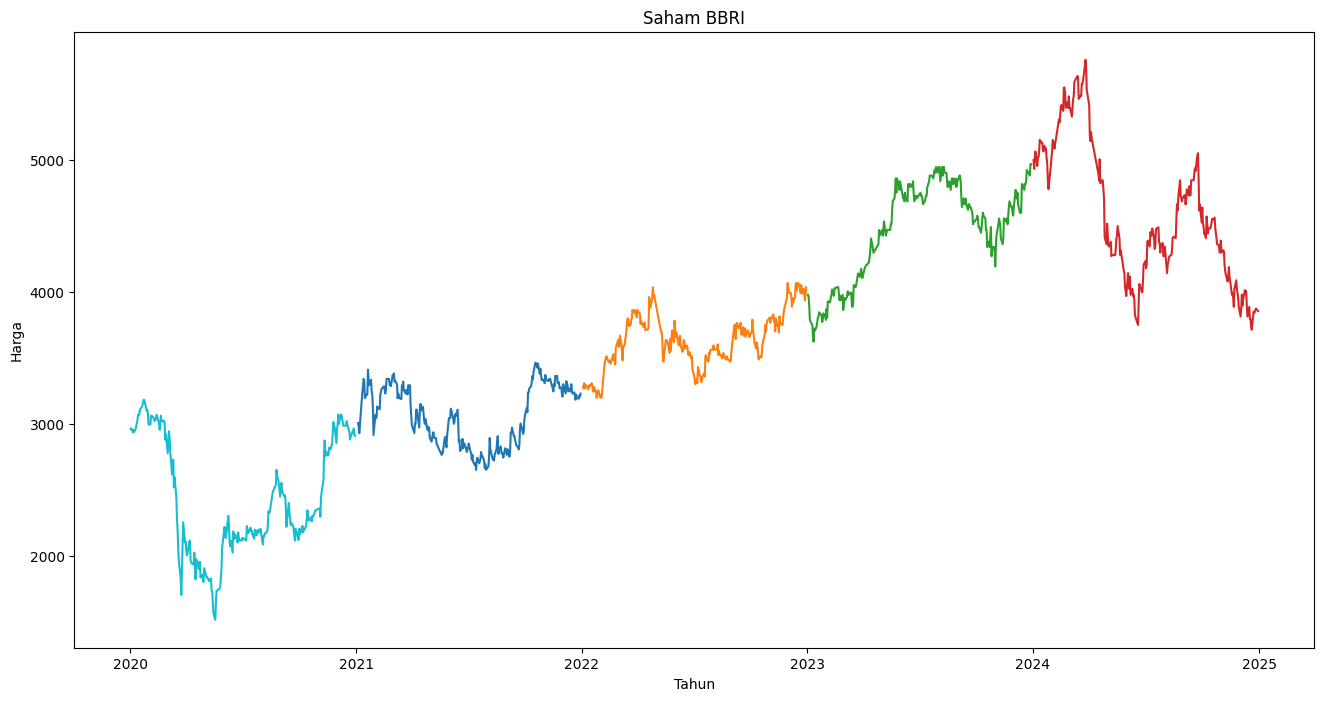

In [ ]:
plt.figure(figsize=(16,8))

for i in range(11,25): # 2020 - 2024
  plt.plot(df_year[i]['Price'], df_year[i]['Close'])

plt.title('Saham BBRI')
plt.xlabel('Tahun')
plt.ylabel('Harga')
plt.savefig('BBRI.png')
plt.show()

#PREPROCESSING

In [ ]:
df_use = df[df['year'] >= 2020]

In [ ]:
df_use = df_use[['Close', 'Price']]

In [ ]:
df_use

,Close,Price
2,2960.843018,2020-01-02
3,2967.557617,2020-01-03
4,2933.987793,2020-01-06
5,2954.129639,2020-01-07
6,2940.701416,2020-01-08
...,...,...
1208,3713.997803,2024-12-20
1209,3851.214600,2024-12-23
1210,3842.066895,2024-12-24
1211,3875.147217,2024-12-27


In [ ]:
df_use = df_use.set_index('Price')

In [ ]:
# Statistika deskriptif
stat_deskriptif = df_use.describe()

# Menambahkan nilai modus
modus = df_use.mode().iloc[0]
stat_deskriptif.loc['mode'] = modus

# Menampilkan hasil
print("Statistika Deskriptif:")
print(stat_deskriptif)

Statistika Deskriptif:
             Close
count  1211.000000
mean   3628.581997
std     893.890704
min    1513.757202
25%    2997.011841
50%    3619.372314
75%    4363.001953
max    5763.100098
mode   4818.837402


In [ ]:
df_use_clone = df_use['Close']

In [ ]:
print("Missing value pada data harga saham BBRI: ")
df_use.isna().sum()

Missing value pada data harga saham BBRI: 


,0
Close,0


In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_use)

In [ ]:
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled[:train_size], df_scaled[train_size:]

In [ ]:
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

In [ ]:
look_back = 10
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

Pembatas 1

In [ ]:
look_back = 10
X, y = create_dataset(df_scaled, look_back)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Pembatas 2

In [ ]:
look_back = 10
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [ ]:
train_size = int(len(df_scaled) * 0.8)
train, test = df_scaled[:train_size], df_scaled[train_size:]

#FUNGSI

##SVR

###Kernel Linear

In [ ]:
# Pipeline preprocessing
pipeline = Pipeline([
    ('svr', SVR())
])

# Grid search parameter grid
param_grid = {
    'svr__kernel': ['linear'],
    'svr__epsilon': [0.0001, 0.001, 0.01, 0.1],
    'svr__C': [10.0, 100.0, 1000.0]
}

# Inisialisasi GridSearchCV
grid_search_SVR_linear = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=2,
                           n_jobs=1,
                           return_train_score=True)


In [ ]:
# Fit ke data
grid_search_SVR_linear.fit(X_train, y_train)

# Best parameters dan skor
print("Best hyperparameters:", grid_search_SVR_linear.best_params_)
print("Best MSE:", -grid_search_SVR_linear.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__kernel=linear; total time=   0.4s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__kernel=linear; total time=   0.3s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__kernel=linear; total time=   0.4s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__kernel=linear; total time=   0.6s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__kernel=linear; total time=   0.2s
[CV] END svr__C=10.0, svr__epsilon=0.001, svr__kernel=linear; total time=   0.2s
[CV] END svr__C=10.0, svr__epsilon=0.001, svr__kernel=linear; total time=   0.2s
[CV] END svr__C=10.0, svr__epsilon=0.001, svr__kernel=linear; total time=   0.3s
[CV] END svr__C=10.0, svr__epsilon=0.001, svr__kernel=linear; total time=   0.3s
[CV] END svr__C=10.0, svr__epsilon=0.001, svr__kernel=linear; total time=   0.2s
[CV] END .svr__C=10.0, svr__epsilon=0.01, svr__kernel=linear; total time=   0.1s
[CV] END .svr__C=10.0, svr__epsilon=0.01, s

In [ ]:
results_df = pd.DataFrame(grid_search_SVR_linear.cv_results_)
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']
print("\nAll Grid Search Results:")
print(results_df[['params', 'mean_test_MSE']])

results_df.to_csv("grid_search_svr_linear_results.csv", index=False)


All Grid Search Results:
                                               params  mean_test_MSE
0   {'svr__C': 10.0, 'svr__epsilon': 0.0001, 'svr_...       0.000220
1   {'svr__C': 10.0, 'svr__epsilon': 0.0001, 'svr_...       0.000220
2   {'svr__C': 10.0, 'svr__epsilon': 0.0001, 'svr_...       0.000220
3   {'svr__C': 10.0, 'svr__epsilon': 0.0001, 'svr_...       0.000220
4   {'svr__C': 10.0, 'svr__epsilon': 0.001, 'svr__...       0.000221
5   {'svr__C': 10.0, 'svr__epsilon': 0.001, 'svr__...       0.000221
6   {'svr__C': 10.0, 'svr__epsilon': 0.001, 'svr__...       0.000221
7   {'svr__C': 10.0, 'svr__epsilon': 0.001, 'svr__...       0.000221
8   {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__g...       0.000221
9   {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__g...       0.000221
10  {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__g...       0.000221
11  {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__g...       0.000221
12  {'svr__C': 10.0, 'svr__epsilon': 0.1, 'svr__ga...       0.002853
13  {'sv

In [ ]:
# Ambil hasil grid search ke DataFrame
results_df = pd.DataFrame(grid_search_SVR_linear.cv_results_)

# Ambil kolom params dan skor
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']

# Pecah 'params' menjadi kolom-kolom parameter
params_df = results_df['params'].apply(pd.Series)

# Gabungkan dengan MSE
final_df = pd.concat([params_df, results_df['mean_test_MSE']], axis=1)

# Simpan ke CSV
final_df.to_csv("grid_search_svr_linear_results.csv", index=False)

# Tampilkan 5 baris pertama
print("\nAll Grid Search Results (separated columns):")
print(final_df.head())


All Grid Search Results (separated columns):
   svr__C  svr__epsilon svr__kernel  mean_test_MSE
0    10.0        0.0001      linear       0.000261
1    10.0        0.0010      linear       0.000261
2    10.0        0.0100      linear       0.000261
3    10.0        0.1000      linear       0.002556
4   100.0        0.0001      linear       0.000261


In [ ]:
joblib.dump(grid_search_SVR_linear.best_estimator_, 'best_model_svr_linear.pkl')
print("\nModel disimpan sebagai 'best_model_svr_linear.pkl'")


Model disimpan sebagai 'best_model_svr_linear.pkl'


In [ ]:
grid_search_SVR_linear = load('best_model_svr_linear.pkl')

###Kernel Polynomial

In [ ]:
# Pipeline preprocessing
pipeline = Pipeline([
    ('svr', SVR())
])

# Grid search parameter grid
param_grid = {
    'svr__kernel': ['poly'],
    'svr__epsilon': [0.0001, 0.001, 0.01, 0.1],
    'svr__gamma': [0.00001, 0.0001, 0.001, 0.01],
    'svr__C': [10.0, 100.0, 1000.0]
}

# Inisialisasi GridSearchCV
grid_search_SVR_poly = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=2,
                           n_jobs=1,
                           return_train_score=True)

In [ ]:
# Fit ke data
grid_search_SVR_poly.fit(X_train, y_train)

# Best parameters dan skor
print("Best hyperparameters:", grid_search_SVR_poly.best_params_)
print("Best MSE:", -grid_search_SVR_poly.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=poly; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamm

In [ ]:
results_df = pd.DataFrame(grid_search_SVR_poly.cv_results_)
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']
print("\nAll Grid Search Results:")
print(results_df[['params', 'mean_test_MSE']])

In [ ]:
# Ambil hasil grid search ke DataFrame
results_df = pd.DataFrame(grid_search_SVR_poly.cv_results_)

# Ambil kolom params dan skor
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']

# Pecah 'params' menjadi kolom-kolom parameter
params_df = results_df['params'].apply(pd.Series)

# Gabungkan dengan MSE
final_df = pd.concat([params_df, results_df['mean_test_MSE']], axis=1)

# Simpan ke CSV
final_df.to_csv("grid_search_svr_polynomial_results.csv", index=False)

# Tampilkan 5 baris pertama
print("\nAll Grid Search Results (separated columns):")
print(final_df.head())


All Grid Search Results (separated columns):
   svr__C  svr__epsilon  svr__gamma svr__kernel  mean_test_MSE
0    10.0        0.0001     0.00001        poly       0.049096
1    10.0        0.0001     0.00010        poly       0.049096
2    10.0        0.0001     0.00100        poly       0.049066
3    10.0        0.0001     0.01000        poly       0.023270
4    10.0        0.0010     0.00001        poly       0.049251


In [ ]:
joblib.dump(grid_search_SVR_poly.best_estimator_, 'best_model_svr_poly.pkl')
print("\nModel disimpan sebagai 'best_model_svr_poly.pkl'")


Model disimpan sebagai 'best_model_svr_poly.pkl'


In [ ]:
grid_search_SVR_poly = load('best_model_svr_poly.pkl')

###Kernel RBF

In [ ]:
# Pipeline preprocessing
pipeline = Pipeline([
    ('svr', SVR())
])

# Grid search parameter grid
param_grid = {
    'svr__kernel': ['rbf'],
    'svr__epsilon': [0.0001, 0.001, 0.01, 0.1],
    'svr__gamma': [0.00001, 0.0001, 0.001, 0.01],
    'svr__C': [10.0, 100.0, 1000.0]
}

# Inisialisasi GridSearchCV
grid_search_SVR_rbf = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=2,
                           n_jobs=1,
                           return_train_score=True)

In [ ]:
# Fit ke data
grid_search_SVR_rbf.fit(X_train, y_train)

# Best parameters dan skor
print("Best hyperparameters:", grid_search_SVR_rbf.best_params_)
print("Best MSE:", -grid_search_SVR_rbf.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=rbf; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001,

In [ ]:
results_df = pd.DataFrame(grid_search_SVR_rbf.cv_results_)
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']
print("\nAll Grid Search Results:")
print(results_df[['params', 'mean_test_MSE']])

results_df.to_csv("grid_search_svr_linear_results.csv", index=False)


All Grid Search Results:
                                               params  mean_test_MSE
0   {'svr__C': 10.0, 'svr__epsilon': 0.0001, 'svr_...       0.045288
1   {'svr__C': 10.0, 'svr__epsilon': 0.0001, 'svr_...       0.001432
2   {'svr__C': 10.0, 'svr__epsilon': 0.0001, 'svr_...       0.000593
3   {'svr__C': 10.0, 'svr__epsilon': 0.0001, 'svr_...       0.000391
4   {'svr__C': 10.0, 'svr__epsilon': 0.001, 'svr__...       0.045314
5   {'svr__C': 10.0, 'svr__epsilon': 0.001, 'svr__...       0.001424
6   {'svr__C': 10.0, 'svr__epsilon': 0.001, 'svr__...       0.000592
7   {'svr__C': 10.0, 'svr__epsilon': 0.001, 'svr__...       0.000396
8   {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__g...       0.045403
9   {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__g...       0.001488
10  {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__g...       0.000623
11  {'svr__C': 10.0, 'svr__epsilon': 0.01, 'svr__g...       0.000413
12  {'svr__C': 10.0, 'svr__epsilon': 0.1, 'svr__ga...       0.052023
13  {'sv

In [ ]:
# Ambil hasil grid search ke DataFrame
results_df = pd.DataFrame(grid_search_SVR_rbf.cv_results_)

# Ambil kolom params dan skor
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']

# Pecah 'params' menjadi kolom-kolom parameter
params_df = results_df['params'].apply(pd.Series)

# Gabungkan dengan MSE
final_df = pd.concat([params_df, results_df['mean_test_MSE']], axis=1)

# Simpan ke CSV
final_df.to_csv("grid_search_svr_rbf_results.csv", index=False)

# Tampilkan 5 baris pertama
print("\nAll Grid Search Results (separated columns):")
print(final_df.head())


All Grid Search Results (separated columns):
   svr__C  svr__epsilon  svr__gamma svr__kernel  mean_test_MSE
0    10.0        0.0001     0.00001         rbf       0.032870
1    10.0        0.0001     0.00010         rbf       0.001115
2    10.0        0.0001     0.00100         rbf       0.000420
3    10.0        0.0001     0.01000         rbf       0.000249
4    10.0        0.0010     0.00001         rbf       0.032985


In [ ]:
joblib.dump(grid_search_SVR_rbf.best_estimator_, 'best_model_svr_rbf.pkl')
print("\nModel disimpan sebagai 'best_model_svr_rbf.pkl'")


Model disimpan sebagai 'best_model_svr_rbf.pkl'


In [ ]:
grid_search_SVR_rbf = load('best_model_svr_rbf.pkl')

###Kernel Sigmoid

In [ ]:
# Pipeline preprocessing
pipeline = Pipeline([
    ('svr', SVR())
])

# Grid search parameter grid
param_grid = {
    'svr__kernel': ['sigmoid'],
    'svr__epsilon': [0.0001, 0.001, 0.01, 0.1],
    'svr__gamma': [0.00001, 0.0001, 0.001, 0.01],
    'svr__C': [10.0, 100.0, 1000.0]
}

# Inisialisasi GridSearchCV
grid_search_SVR_sigmoid = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           verbose=2,
                           n_jobs=1,
                           return_train_score=True)

In [ ]:
# Fit ke data
grid_search_SVR_sigmoid.fit(X_train, y_train)

# Best parameters dan skor
print("Best hyperparameters:", grid_search_SVR_sigmoid.best_params_)
print("Best MSE:", -grid_search_SVR_sigmoid.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=1e-05, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10.0, svr__epsilon=0.0001, svr__gamma=0.0001, svr__kernel=sigmoid; total time=   0.0s
[CV] END svr__C=10.0, svr

In [ ]:
results_df = pd.DataFrame(grid_search_SVR_sigmoid.cv_results_)
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']
print("\nAll Grid Search Results:")
print(results_df[['params', 'mean_test_MSE']])


All Grid Search Results:
                                               params  mean_test_MSE
0   {'svr__C': 0.1, 'svr__epsilon': 0.01, 'svr__ga...       0.000404
1   {'svr__C': 0.1, 'svr__epsilon': 0.01, 'svr__ga...       0.032797
2   {'svr__C': 0.1, 'svr__epsilon': 0.01, 'svr__ga...       0.088213
3   {'svr__C': 0.1, 'svr__epsilon': 0.01, 'svr__ga...       2.668200
4   {'svr__C': 0.1, 'svr__epsilon': 0.01, 'svr__ga...       0.000404
..                                                ...            ...
91  {'svr__C': 100.0, 'svr__epsilon': 1.0, 'svr__g...       0.095089
92  {'svr__C': 100.0, 'svr__epsilon': 1.0, 'svr__g...       0.095089
93  {'svr__C': 100.0, 'svr__epsilon': 1.0, 'svr__g...       0.095089
94  {'svr__C': 100.0, 'svr__epsilon': 1.0, 'svr__g...       0.095089
95  {'svr__C': 100.0, 'svr__epsilon': 1.0, 'svr__g...       0.095089

[96 rows x 2 columns]


In [ ]:
# Ambil hasil grid search ke DataFrame
results_df = pd.DataFrame(grid_search_SVR_sigmoid.cv_results_)

# Ambil kolom params dan skor
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']

# Pecah 'params' menjadi kolom-kolom parameter
params_df = results_df['params'].apply(pd.Series)

# Gabungkan dengan MSE
final_df = pd.concat([params_df, results_df['mean_test_MSE']], axis=1)

# Simpan ke CSV
final_df.to_csv("grid_search_svr_sigmoid_results.csv", index=False)

# Tampilkan 5 baris pertama
print("\nAll Grid Search Results (separated columns):")
print(final_df.head())


All Grid Search Results (separated columns):
   svr__C  svr__epsilon  svr__gamma svr__kernel  mean_test_MSE
0    10.0        0.0001     0.00001     sigmoid       0.040713
1    10.0        0.0001     0.00010     sigmoid       0.003607
2    10.0        0.0001     0.00100     sigmoid       0.000527
3    10.0        0.0001     0.01000     sigmoid       0.000265
4    10.0        0.0010     0.00001     sigmoid       0.040742


In [ ]:
joblib.dump(grid_search_SVR_sigmoid.best_estimator_, 'best_model_svr_sigmoid.pkl')
print("\nModel disimpan sebagai 'best_model_svr_sigmoid.pkl'")


Model disimpan sebagai 'best_model_svr_sigmoid.pkl'


In [ ]:
grid_search_SVR_sigmoid = load('best_model_svr_sigmoid.pkl')

##KNN

###Euclidean

In [ ]:
# Pipeline hanya KNN tanpa scaling
pipeline = Pipeline([
    ('knn', KNeighborsRegressor())
])

# Grid search parameter grid
param_grid = {
    'knn__n_neighbors': list(range(1, 51)),
    'knn__metric': ['euclidean']
}

# Inisialisasi GridSearchCV
grid_search_KNN_euclidean = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,  # 5-fold cross-validation
                           verbose=2,
                           n_jobs=1,
                           return_train_score=True)


In [ ]:
# Fit ke data
grid_search_KNN_euclidean.fit(X_train, y_train)

# Best parameters dan skor
print("Best hyperparameters:", grid_search_KNN_euclidean.best_params_)
print("Best MSE:", -grid_search_KNN_euclidean.best_score_)  # negated back to positive MSE

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__n_neighbors=3; total time=   0.0s
[CV] END ..........knn__metric=euclidean, knn__

In [ ]:
results_df = pd.DataFrame(grid_search_KNN_euclidean.cv_results_)
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']
print("\nAll Grid Search Results:")
print(results_df[['params', 'mean_test_MSE']])


All Grid Search Results:
                                               params  mean_test_MSE
0   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.009501
1   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.008936
2   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.009032
3   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.009101
4   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.009165
5   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.009266
6   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.009624
7   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.010119
8   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.010415
9   {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.010705
10  {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.010951
11  {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.011133
12  {'knn__metric': 'euclidean', 'knn__n_neighbors...       0.011354
13  {'kn

In [ ]:
# Ambil hasil grid search ke DataFrame
results_df = pd.DataFrame(grid_search_KNN_euclidean.cv_results_)

# Ambil kolom params dan skor
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']

# Pecah 'params' menjadi kolom-kolom parameter
params_df = results_df['params'].apply(pd.Series)

# Gabungkan dengan MSE
final_df = pd.concat([params_df, results_df['mean_test_MSE']], axis=1)

# Simpan ke CSV
final_df.to_csv("grid_search_knn_euclidean_results.csv", index=False)

# Tampilkan 5 baris pertama
print("\nAll Grid Search Results (separated columns):")
print(final_df.head())


All Grid Search Results (separated columns):
  knn__metric  knn__n_neighbors  mean_test_MSE
0   euclidean                 1       0.006208
1   euclidean                 2       0.005840
2   euclidean                 3       0.005903
3   euclidean                 4       0.005948
4   euclidean                 5       0.005990


In [ ]:
joblib.dump(grid_search_KNN_euclidean.best_estimator_, 'best_model_knn_euclidean.pkl')
print("\nModel disimpan sebagai 'best_model_knn_euclidean.pkl'")


Model disimpan sebagai 'best_model_knn_euclidean.pkl'


In [ ]:
grid_search_KNN_euclidean = load('best_model_knn_euclidean.pkl')

###Manhattan

In [ ]:
# Pipeline hanya KNN tanpa scaling
pipeline = Pipeline([
    ('knn', KNeighborsRegressor())
])

# Grid search parameter grid
param_grid = {
    'knn__n_neighbors': list(range(1, 51)),
    'knn__metric': ['manhattan']
}

# Inisialisasi GridSearchCV
grid_search_KNN_manhattan = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,  # 5-fold cross-validation
                           verbose=2,
                           n_jobs=1,
                           return_train_score=True)


In [ ]:
# Fit ke data
grid_search_KNN_manhattan.fit(X_train, y_train)

# Best parameters dan skor
print("Best hyperparameters:", grid_search_KNN_manhattan.best_params_)
print("Best MSE:", -grid_search_KNN_manhattan.best_score_)  # negated back to positive MSE

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__n_neighbors=3; total time=   0.0s
[CV] END ..........knn__metric=manhattan, knn__

In [ ]:
results_df = pd.DataFrame(grid_search_KNN_manhattan.cv_results_)
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']
print("\nAll Grid Search Results:")
print(results_df[['params', 'mean_test_MSE']])


All Grid Search Results:
                                               params  mean_test_MSE
0   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.009488
1   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.008828
2   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.009110
3   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.009144
4   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.009279
5   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.009246
6   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.009539
7   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.010151
8   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.010440
9   {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.010743
10  {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.011031
11  {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.011194
12  {'knn__metric': 'manhattan', 'knn__n_neighbors...       0.011373
13  {'kn

In [ ]:
# Ambil hasil grid search ke DataFrame
results_df = pd.DataFrame(grid_search_KNN_manhattan.cv_results_)

# Ambil kolom params dan skor
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']

# Pecah 'params' menjadi kolom-kolom parameter
params_df = results_df['params'].apply(pd.Series)

# Gabungkan dengan MSE
final_df = pd.concat([params_df, results_df['mean_test_MSE']], axis=1)

# Simpan ke CSV
final_df.to_csv("grid_search_knn_manhattan_results.csv", index=False)

# Tampilkan 5 baris pertama
print("\nAll Grid Search Results (separated columns):")
print(final_df.head())


All Grid Search Results (separated columns):
  knn__metric  knn__n_neighbors  mean_test_MSE
0   manhattan                 1       0.006203
1   manhattan                 2       0.005769
2   manhattan                 3       0.005957
3   manhattan                 4       0.005976
4   manhattan                 5       0.006064


In [ ]:
joblib.dump(grid_search_KNN_manhattan.best_estimator_, 'best_model_knn_manhattan.pkl')
print("\nModel disimpan sebagai 'best_model_knn_manhattan.pkl'")


Model disimpan sebagai 'best_model_knn_manhattan.pkl'


In [ ]:
grid_search_KNN_manhattan = load('best_model_knn_manhattan.pkl')

###Chebyshev

In [ ]:
# Pipeline hanya KNN tanpa scaling
pipeline = Pipeline([
    ('knn', KNeighborsRegressor())
])

# Grid search parameter grid
param_grid = {
    'knn__n_neighbors': list(range(1, 51)),
    'knn__metric': ['chebyshev']
}

# Inisialisasi GridSearchCV
grid_search_KNN_chebyshev = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,  # 5-fold cross-validation
                           verbose=2,
                           n_jobs=1,
                           return_train_score=True)


In [ ]:
# Fit ke data
grid_search_KNN_chebyshev.fit(X_train, y_train)

# Best parameters dan skor
print("Best hyperparameters:", grid_search_KNN_chebyshev.best_params_)
print("Best MSE:", -grid_search_KNN_chebyshev.best_score_)  # negated back to positive MSE

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=1; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=2; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__n_neighbors=3; total time=   0.0s
[CV] END ..........knn__metric=chebyshev, knn__

In [ ]:
results_df = pd.DataFrame(grid_search_KNN_chebyshev.cv_results_)
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']
print("\nAll Grid Search Results:")
print(results_df[['params', 'mean_test_MSE']])


All Grid Search Results:
                                               params  mean_test_MSE
0   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.009484
1   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.009144
2   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.009080
3   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.009083
4   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.009259
5   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.009414
6   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.009786
7   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.010122
8   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.010357
9   {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.010598
10  {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.010801
11  {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.010960
12  {'knn__metric': 'chebyshev', 'knn__n_neighbors...       0.011105
13  {'kn

In [ ]:
# Ambil hasil grid search ke DataFrame
results_df = pd.DataFrame(grid_search_KNN_chebyshev.cv_results_)

# Ambil kolom params dan skor
results_df = results_df[['params', 'mean_test_score']]
results_df['mean_test_MSE'] = -results_df['mean_test_score']

# Pecah 'params' menjadi kolom-kolom parameter
params_df = results_df['params'].apply(pd.Series)

# Gabungkan dengan MSE
final_df = pd.concat([params_df, results_df['mean_test_MSE']], axis=1)

# Simpan ke CSV
final_df.to_csv("grid_search_knn_chebyshev_results.csv", index=False)

# Tampilkan 5 baris pertama
print("\nAll Grid Search Results (separated columns):")
print(final_df.head())


All Grid Search Results (separated columns):
  knn__metric  knn__n_neighbors  mean_test_MSE
0   chebyshev                 1       0.006198
1   chebyshev                 2       0.005978
2   chebyshev                 3       0.005922
3   chebyshev                 4       0.005935
4   chebyshev                 5       0.006052


In [ ]:
joblib.dump(grid_search_KNN_chebyshev.best_estimator_, 'best_model_knn_chebyshev.pkl')
print("\nModel disimpan sebagai 'best_model_knn_chebyshev.pkl'")


Model disimpan sebagai 'best_model_knn_chebyshev.pkl'


In [ ]:
grid_search_KNN_chebyshev = load('best_model_knn_chebyshev.pkl')

#EVALUASI

In [ ]:
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))

In [ ]:
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

##SVR

###Data Latih

In [ ]:
y_train_pred_SVR_linear = grid_search_SVR_linear.predict(X_train)
y_train_pred_SVR_linear_inv = scaler.inverse_transform(y_train_pred_SVR_linear.reshape(-1, 1))

y_train_pred_SVR_poly = grid_search_SVR_poly.predict(X_train)
y_train_pred_SVR_poly_inv = scaler.inverse_transform(y_train_pred_SVR_poly.reshape(-1, 1))

y_train_pred_SVR_rbf = grid_search_SVR_rbf.predict(X_train)
y_train_pred_SVR_rbf_inv = scaler.inverse_transform(y_train_pred_SVR_rbf.reshape(-1, 1))

y_train_pred_SVR_sigmoid = grid_search_SVR_sigmoid.predict(X_train)
y_train_pred_SVR_sigmoid_inv = scaler.inverse_transform(y_train_pred_SVR_sigmoid.reshape(-1, 1))


In [ ]:
mse = mean_squared_error(y_train_inv, y_train_pred_SVR_linear_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_inv, y_train_pred_SVR_linear_inv)
mape = np.mean(np.abs((y_train_inv - y_train_pred_SVR_linear_inv) / y_train_inv)) * 100

print("Hasil Evaluasi Model SVR Kernel Linear menggunakan Data Latih")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model SVR Kernel Linear menggunakan Data Latih
Root Mean Squared Error (RMSE): 65.6758
Mean Absolute Error (MAE): 48.1221
Mean Absolute Percentage Error (MAPE): 1.47%


In [ ]:
mse = mean_squared_error(y_train_inv, y_train_pred_SVR_poly_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_inv, y_train_pred_SVR_poly_inv)
mape = np.mean(np.abs((y_train_inv - y_train_pred_SVR_poly_inv) / y_train_inv)) * 100

print("Hasil Evaluasi Model SVR Kernel Polynomial menggunakan Data Latih")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model SVR Kernel Polynomial menggunakan Data Latih
Root Mean Squared Error (RMSE): 338.1455
Mean Absolute Error (MAE): 295.1579
Mean Absolute Percentage Error (MAPE): 9.20%


In [ ]:
mse = mean_squared_error(y_train_inv, y_train_pred_SVR_rbf_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_inv, y_train_pred_SVR_rbf_inv)
mape = np.mean(np.abs((y_train_inv - y_train_pred_SVR_rbf_inv) / y_train_inv)) * 100

print("Hasil Evaluasi Model SVR Kernel RBF menggunakan Data Latih")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model SVR Kernel RBF menggunakan Data Latih
Root Mean Squared Error (RMSE): 66.0796
Mean Absolute Error (MAE): 48.0144
Mean Absolute Percentage Error (MAPE): 1.47%


In [ ]:
mse = mean_squared_error(y_train_inv, y_train_pred_SVR_sigmoid_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_inv, y_train_pred_SVR_sigmoid_inv)
mape = np.mean(np.abs((y_train_inv - y_train_pred_SVR_sigmoid_inv) / y_train_inv)) * 100

print("Hasil Evaluasi Model SVR Kernel Sigmoid menggunakan Data Latih")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model SVR Kernel Sigmoid menggunakan Data Latih
Root Mean Squared Error (RMSE): 66.2556
Mean Absolute Error (MAE): 48.1148
Mean Absolute Percentage Error (MAPE): 1.47%


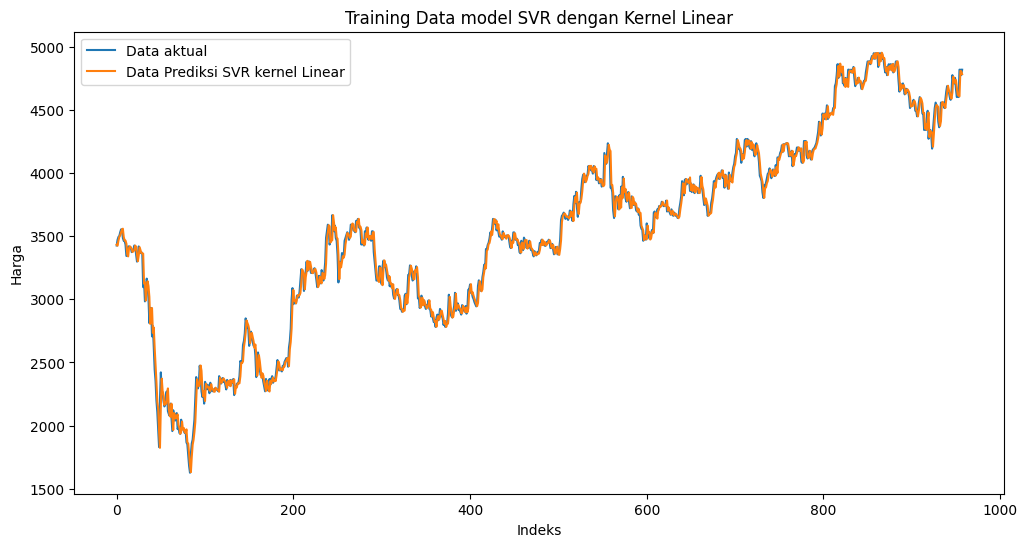

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label="Data aktual", color="C0")
plt.plot(y_train_pred_SVR_linear_inv, label="Data Prediksi SVR kernel Linear", color="C1")
plt.title("Training Data model SVR dengan Kernel Linear")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Training Data model SVR dengan Kernel Linear.png')
plt.show()

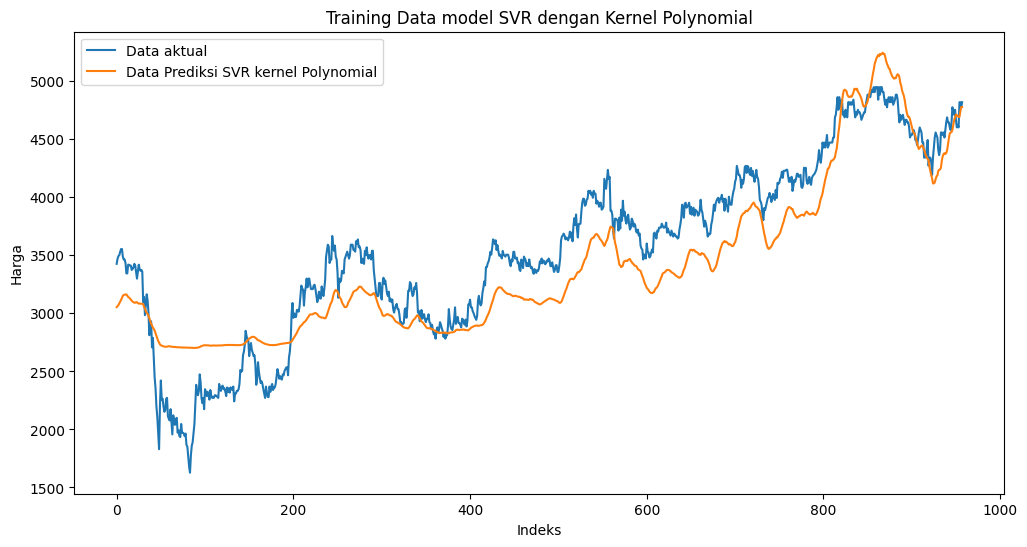

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label="Data aktual", color="C0")
plt.plot(y_train_pred_SVR_poly_inv, label="Data Prediksi SVR kernel Polynomial", color="C1")
plt.title("Training Data model SVR dengan Kernel Polynomial")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Training Data model SVR dengan Kernel Polynomial.png')
plt.show()

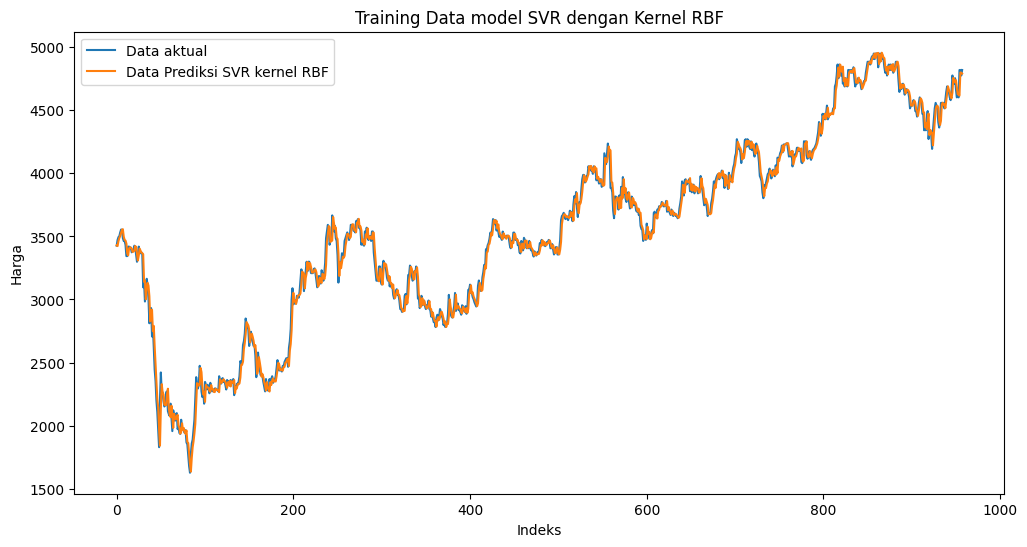

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label="Data aktual", color="C0")
plt.plot(y_train_pred_SVR_rbf_inv, label="Data Prediksi SVR kernel RBF", color="C1")
plt.title("Training Data model SVR dengan Kernel RBF")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Training Data model SVR dengan Kernel RBF.png')
plt.show()

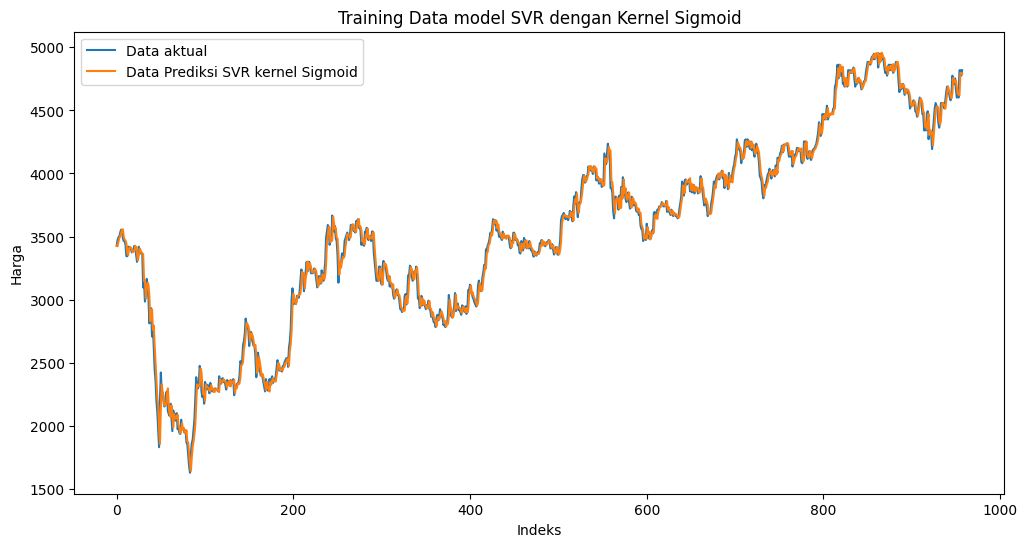

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label="Data aktual", color="C0")
plt.plot(y_train_pred_SVR_sigmoid_inv, label="Data Prediksi SVR kernel Sigmoid", color="C1")
plt.title("Training Data model SVR dengan Kernel Sigmoid")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Training Data model SVR dengan Kernel Sigmoid.png')
plt.show()

###Data uji

In [ ]:
y_pred_SVR_linear = grid_search_SVR_linear.predict(X_test)
y_pred_SVR_linear_inv = scaler.inverse_transform(y_pred_SVR_linear.reshape(-1, 1))

y_pred_SVR_poly = grid_search_SVR_poly.predict(X_test)
y_pred_SVR_poly_inv = scaler.inverse_transform(y_pred_SVR_poly.reshape(-1, 1))

y_pred_SVR_rbf = grid_search_SVR_rbf.predict(X_test)
y_pred_SVR_rbf_inv = scaler.inverse_transform(y_pred_SVR_rbf.reshape(-1, 1))

y_pred_SVR_sigmoid = grid_search_SVR_sigmoid.predict(X_test)
y_pred_SVR_sigmoid_inv = scaler.inverse_transform(y_pred_SVR_sigmoid.reshape(-1, 1))


In [ ]:
mse = mean_squared_error(y_test_inv, y_pred_SVR_linear_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_SVR_linear_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_SVR_linear_inv) / y_test_inv)) * 100

print("Hasil Evaluasi Model SVR Kernel Linear menggunakan Data Uji")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model SVR Kernel Linear menggunakan Data Uji
Root Mean Squared Error (RMSE): 83.3926
Mean Absolute Error (MAE): 63.7815
Mean Absolute Percentage Error (MAPE): 1.40%


In [ ]:
mse = mean_squared_error(y_test_inv, y_pred_SVR_poly_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_SVR_poly_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_SVR_poly_inv) / y_test_inv)) * 100

print("Hasil Evaluasi Model SVR Kernel Polynomial menggunakan Data Uji")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model SVR Kernel Polynomial menggunakan Data Uji
Root Mean Squared Error (RMSE): 588.7171
Mean Absolute Error (MAE): 420.1379
Mean Absolute Percentage Error (MAPE): 8.73%


In [ ]:
mse = mean_squared_error(y_test_inv, y_pred_SVR_rbf_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_SVR_rbf_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_SVR_rbf_inv) / y_test_inv)) * 100

print("Hasil Evaluasi Model SVR Kernel RBF menggunakan Data Uji")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model SVR Kernel RBF menggunakan Data Uji
Root Mean Squared Error (RMSE): 84.6152
Mean Absolute Error (MAE): 64.8619
Mean Absolute Percentage Error (MAPE): 1.43%


In [ ]:
mse = mean_squared_error(y_test_inv, y_pred_SVR_sigmoid_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_SVR_sigmoid_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_SVR_sigmoid_inv) / y_test_inv)) * 100

print("Hasil Evaluasi Model SVR Kernel Sigmoid menggunakan Data Uji")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model SVR Kernel Sigmoid menggunakan Data Uji
Root Mean Squared Error (RMSE): 85.1884
Mean Absolute Error (MAE): 65.2147
Mean Absolute Percentage Error (MAPE): 1.44%


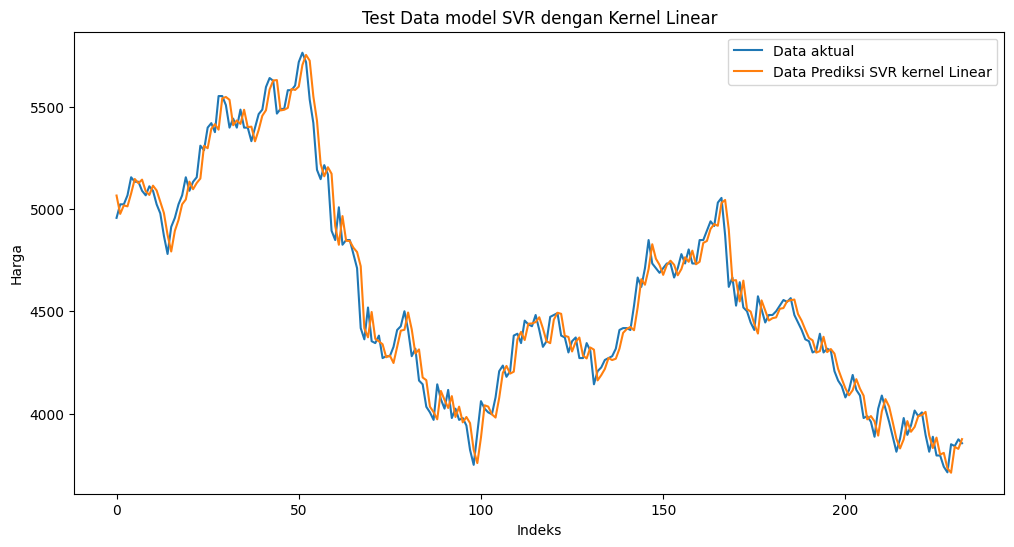

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Data aktual", color="C0")
plt.plot(y_pred_SVR_linear_inv, label="Data Prediksi SVR kernel Linear", color="C1")
plt.title("Test Data model SVR dengan Kernel Linear")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Test Data model SVR dengan Kernel Linear.png')
plt.show()

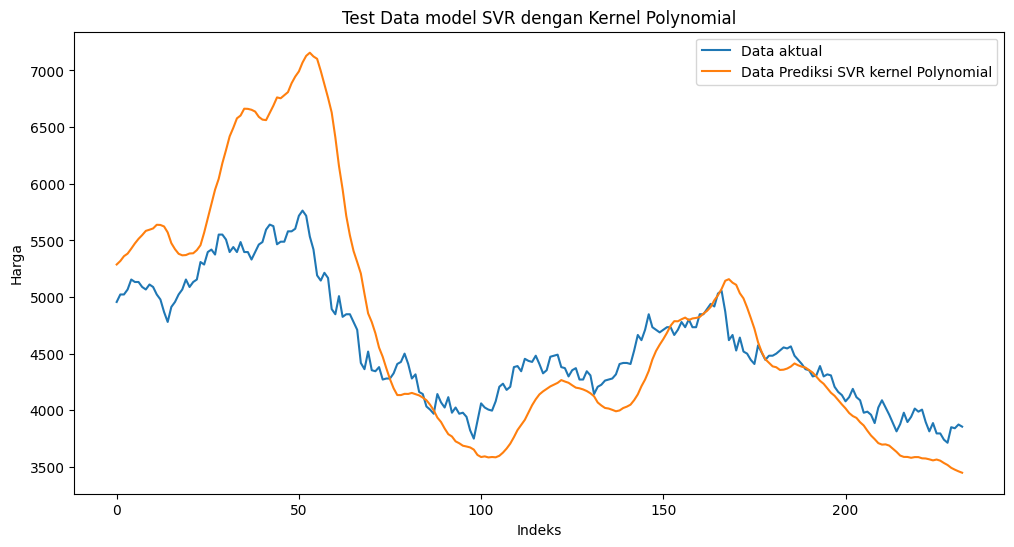

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Data aktual", color="C0")
plt.plot(y_pred_SVR_poly_inv, label="Data Prediksi SVR kernel Polynomial", color="C1")
plt.title("Test Data model SVR dengan Kernel Polynomial")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Test Data model SVR dengan Kernel Polynomial.png')
plt.show()

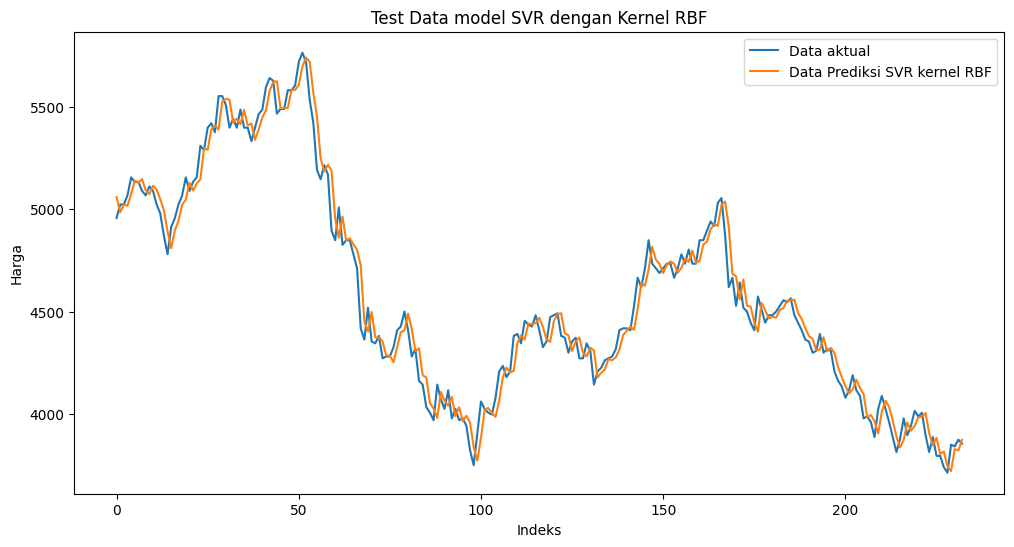

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Data aktual", color="C0")
plt.plot(y_pred_SVR_rbf_inv, label="Data Prediksi SVR kernel RBF", color="C1")
plt.title("Test Data model SVR dengan Kernel RBF")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Test Data model SVR dengan Kernel RBF.png')
plt.show()

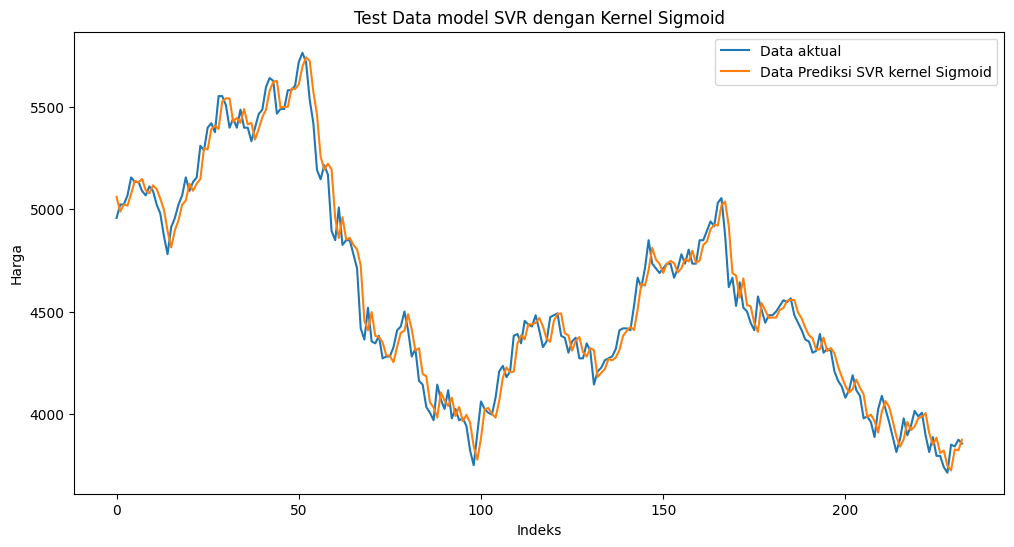

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Data aktual", color="C0")
plt.plot(y_pred_SVR_sigmoid_inv, label="Data Prediksi SVR kernel Sigmoid", color="C1")
plt.title("Test Data model SVR dengan Kernel Sigmoid")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Test Data model SVR dengan Kernel Sigmoid.png')
plt.show()

##KNN

###Data Latih

In [ ]:
y_train_pred_KNN_euclidean = grid_search_KNN_euclidean.predict(X_train)
y_train_pred_KNN_euclidean_inv = scaler.inverse_transform(y_train_pred_KNN_euclidean.reshape(-1, 1))

y_train_pred_KNN_manhattan = grid_search_KNN_manhattan.predict(X_train)
y_train_pred_KNN_manhattan_inv = scaler.inverse_transform(y_train_pred_KNN_manhattan.reshape(-1, 1))

y_train_pred_KNN_chebyshev = grid_search_KNN_chebyshev.predict(X_train)
y_train_pred_KNN_chebyshev_inv = scaler.inverse_transform(y_train_pred_KNN_chebyshev.reshape(-1, 1))

In [ ]:
mse = mean_squared_error(y_train_inv, y_train_pred_KNN_euclidean_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_inv, y_train_pred_KNN_euclidean_inv)
mape = np.mean(np.abs((y_train_inv - y_train_pred_KNN_euclidean_inv) / y_train_inv)) * 100

print("Hasil Evaluasi Model KNN Jenis Matrik Euclidean menggunakan Data Latih")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model KNN Jenis Matrik Euclidean menggunakan Data Latih
Root Mean Squared Error (RMSE): 84.9364
Mean Absolute Error (MAE): 64.8960
Mean Absolute Percentage Error (MAPE): 1.95%


In [ ]:
mse = mean_squared_error(y_train_inv, y_train_pred_KNN_manhattan_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_inv, y_train_pred_KNN_manhattan_inv)
mape = np.mean(np.abs((y_train_inv - y_train_pred_KNN_manhattan_inv) / y_train_inv)) * 100

print("Hasil Evaluasi Model KNN Jenis Matrik Manhattan menggunakan Data Latih")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model KNN Jenis Matrik Manhattan menggunakan Data Latih
Root Mean Squared Error (RMSE): 89.3022
Mean Absolute Error (MAE): 67.0682
Mean Absolute Percentage Error (MAPE): 2.02%


In [ ]:
mse = mean_squared_error(y_train_inv, y_train_pred_KNN_chebyshev_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train_inv, y_train_pred_KNN_chebyshev_inv)
mape = np.mean(np.abs((y_train_inv - y_train_pred_KNN_chebyshev_inv) / y_train_inv)) * 100

print("Hasil Evaluasi Model KNN Jenis Matrik Chebyshev menggunakan Data Uji")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model KNN Jenis Matrik Chebyshev menggunakan Data Uji
Root Mean Squared Error (RMSE): 77.9448
Mean Absolute Error (MAE): 61.1282
Mean Absolute Percentage Error (MAPE): 1.82%


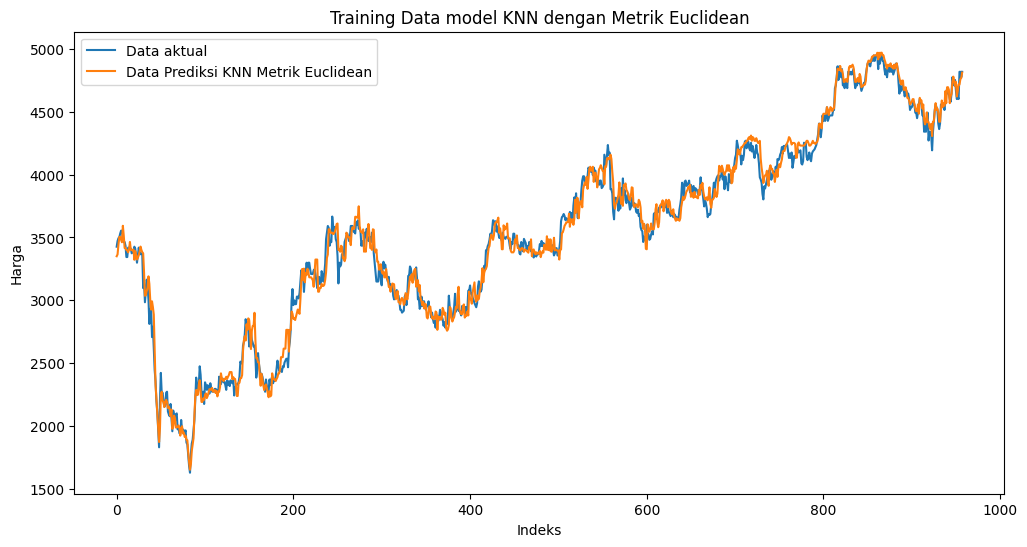

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label="Data aktual", color="C0")
plt.plot(y_train_pred_KNN_euclidean_inv, label="Data Prediksi KNN Metrik Euclidean", color="C1")
plt.title("Training Data model KNN dengan Metrik Euclidean")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Training Data model KNN dengan Metrik Euclidean.png')
plt.show()

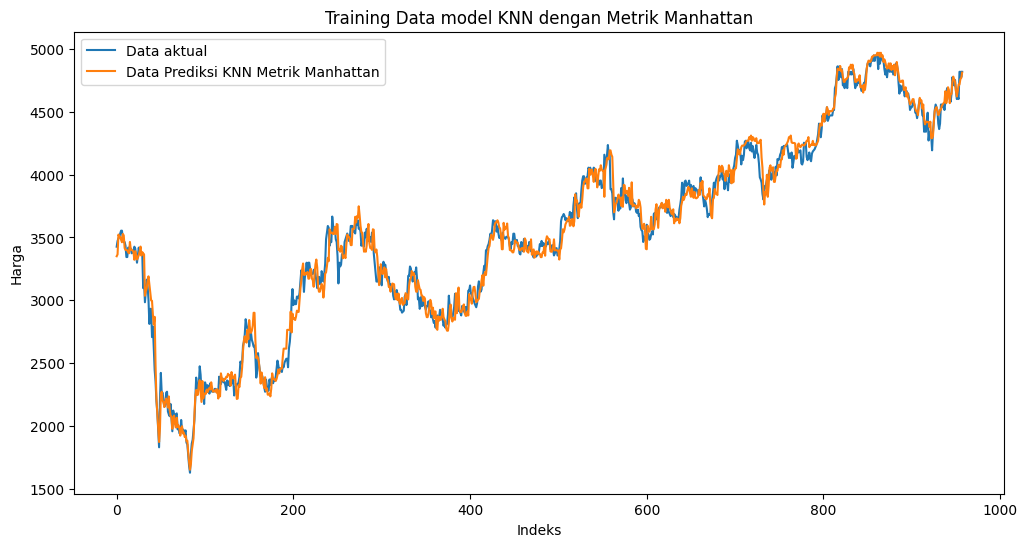

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label="Data aktual", color="C0")
plt.plot(y_train_pred_KNN_manhattan_inv, label="Data Prediksi KNN Metrik Manhattan", color="C1")
plt.title("Training Data model KNN dengan Metrik Manhattan")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Training Data model KNN dengan Metrik Manhattan.png')
plt.show()

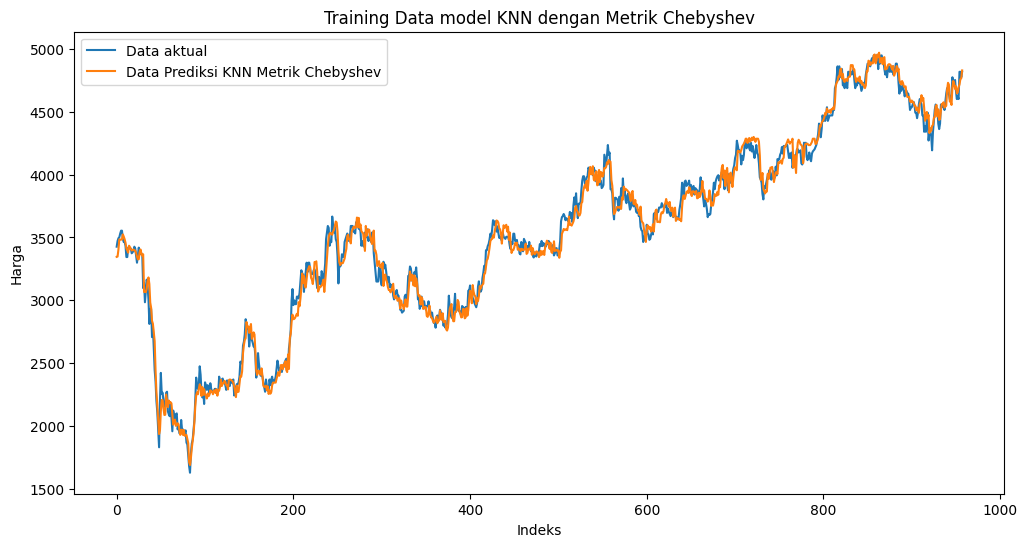

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label="Data aktual", color="C0")
plt.plot(y_train_pred_KNN_chebyshev_inv, label="Data Prediksi KNN Metrik Chebyshev", color="C1")
plt.title("Training Data model KNN dengan Metrik Chebyshev")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Training Data model KNN dengan Metrik Chebyshev.png')
plt.show()

###Data Uji

In [ ]:
y_pred_KNN_euclidean = grid_search_KNN_euclidean.predict(X_test)
y_pred_KNN_euclidean_inv = scaler.inverse_transform(y_pred_KNN_euclidean.reshape(-1, 1))

y_pred_KNN_manhattan = grid_search_KNN_manhattan.predict(X_test)
y_pred_KNN_manhattan_inv = scaler.inverse_transform(y_pred_KNN_manhattan.reshape(-1, 1))

y_pred_KNN_chebyshev = grid_search_KNN_chebyshev.predict(X_test)
y_pred_KNN_chebyshev_inv = scaler.inverse_transform(y_pred_KNN_chebyshev.reshape(-1, 1))

In [ ]:
mse = mean_squared_error(y_test_inv, y_pred_KNN_euclidean_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_KNN_euclidean_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_KNN_euclidean_inv) / y_test_inv)) * 100

print("Hasil Evaluasi Model KNN Jenis Matrik Euclidean menggunakan Data Uji")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model KNN Jenis Matrik Euclidean menggunakan Data Uji
Root Mean Squared Error (RMSE): 262.4033
Mean Absolute Error (MAE): 188.8076
Mean Absolute Percentage Error (MAPE): 3.92%


In [ ]:
mse = mean_squared_error(y_test_inv, y_pred_KNN_manhattan_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_KNN_manhattan_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_KNN_manhattan_inv) / y_test_inv)) * 100

print("Hasil Evaluasi Model KNN Jenis Matrik Manhattan menggunakan Data Uji")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model KNN Jenis Matrik Manhattan menggunakan Data Uji
Root Mean Squared Error (RMSE): 256.2055
Mean Absolute Error (MAE): 185.7315
Mean Absolute Percentage Error (MAPE): 3.87%


In [ ]:
mse = mean_squared_error(y_test_inv, y_pred_KNN_chebyshev_inv)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_inv, y_pred_KNN_chebyshev_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_KNN_chebyshev_inv) / y_test_inv)) * 100

print("Hasil Evaluasi Model KNN Jenis Matrik Chebyshev menggunakan Data Uji")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Hasil Evaluasi Model KNN Jenis Matrik Chebyshev menggunakan Data Uji
Root Mean Squared Error (RMSE): 253.7265
Mean Absolute Error (MAE): 179.8242
Mean Absolute Percentage Error (MAPE): 3.72%


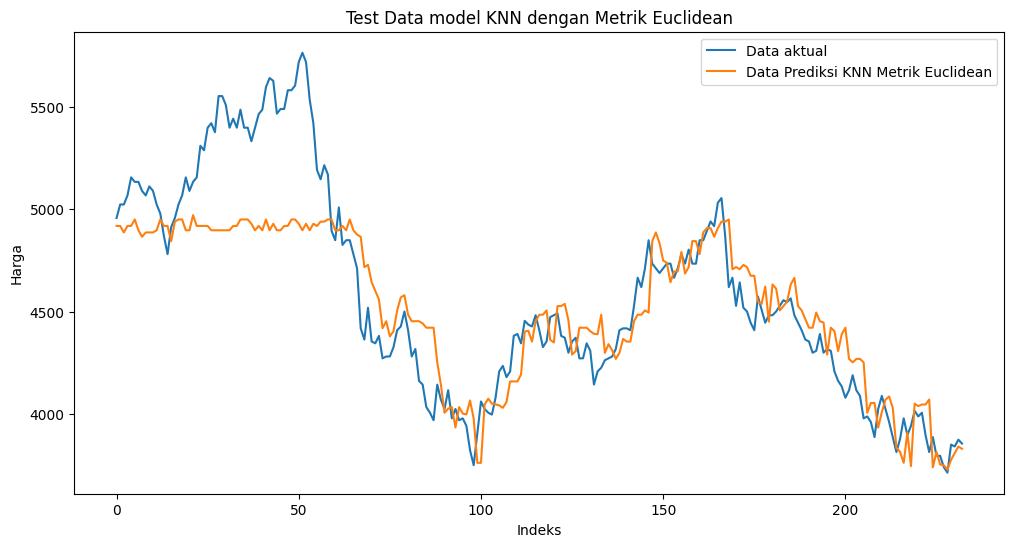

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Data aktual", color="C0")
plt.plot(y_pred_KNN_euclidean_inv, label="Data Prediksi KNN Metrik Euclidean", color="C1")
plt.title("Test Data model KNN dengan Metrik Euclidean")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Test Data model KNN dengan Metrik Euclidean.png')
plt.show()

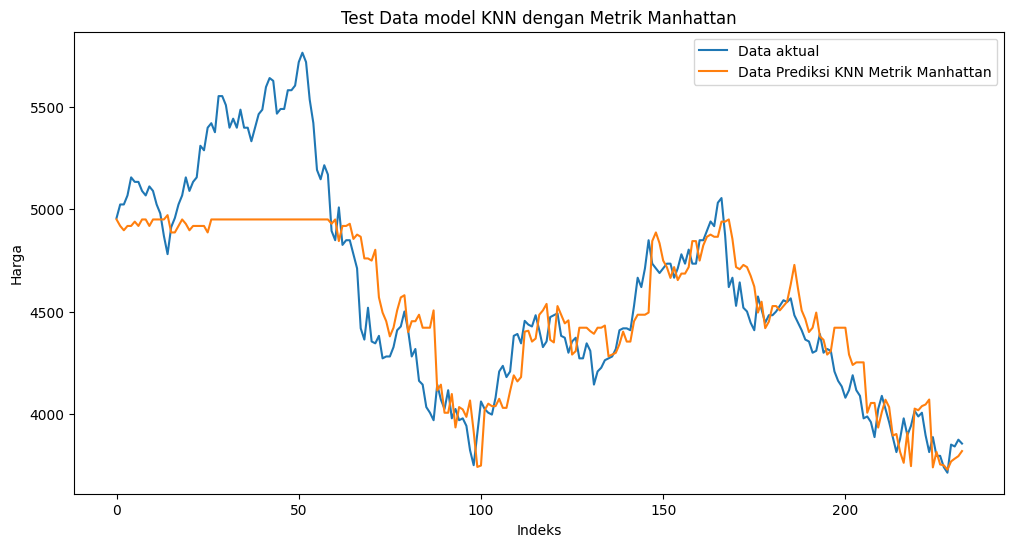

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Data aktual", color="C0")
plt.plot(y_pred_KNN_manhattan_inv, label="Data Prediksi KNN Metrik Manhattan", color="C1")
plt.title("Test Data model KNN dengan Metrik Manhattan")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Test Data model KNN dengan Metrik Manhattan.png')
plt.show()

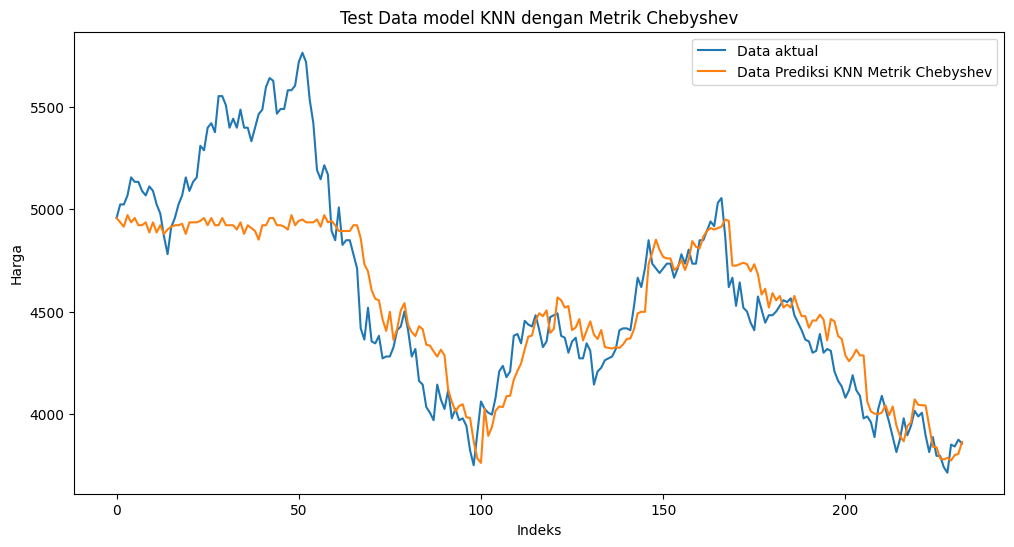

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="Data aktual", color="C0")
plt.plot(y_pred_KNN_chebyshev_inv, label="Data Prediksi KNN Metrik Chebyshev", color="C1")
plt.title("Test Data model KNN dengan Metrik Chebyshev")
plt.xlabel("Indeks")
plt.ylabel("Harga")
plt.legend()
plt.savefig('Test Data model KNN dengan Metrik Chebyshev.png')
plt.show()

#Prediksi

In [ ]:
look_back = 10
n_days_predict = 23

best_model = grid_search_SVR_linear

In [ ]:
last_input = df_scaled[-look_back:].reshape(1, -1)

In [ ]:
predictions = []
current_input = last_input.copy()

In [ ]:
for _ in range(n_days_predict):
    pred = best_model.predict(current_input[:, -look_back:])
    predictions.append(pred[0])
    current_input = np.append(current_input, pred).reshape(1, -1)

predicted_unscaled = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

In [ ]:
start_date = pd.to_datetime("2025-01-01")
date_range = pd.bdate_range(start=start_date, periods=n_days_predict)

In [ ]:
df_forecast = pd.DataFrame({
    'Date': date_range,
    'Predicted_Close': predicted_unscaled.flatten()
})
df_forecast.to_csv("prediksi_harga_saham_januari_2025.csv", index=False)
print(df_forecast)

         Date  Predicted_Close
0  2025-01-01      3847.737056
1  2025-01-02      3842.286659
2  2025-01-03      3848.674437
3  2025-01-06      3844.772476
4  2025-01-07      3849.175103
5  2025-01-08      3853.483504
6  2025-01-09      3851.475774
7  2025-01-10      3851.759948
8  2025-01-13      3850.391582
9  2025-01-14      3848.699037
10 2025-01-15      3848.410719
11 2025-01-16      3848.200136
12 2025-01-17      3847.271678
13 2025-01-20      3846.999443
14 2025-01-21      3846.347394
15 2025-01-22      3845.412810
16 2025-01-23      3844.735919
17 2025-01-24      3843.929832
18 2025-01-27      3843.100284
19 2025-01-28      3842.410497
20 2025-01-29      3841.654698
21 2025-01-30      3840.866287
22 2025-01-31      3840.127602


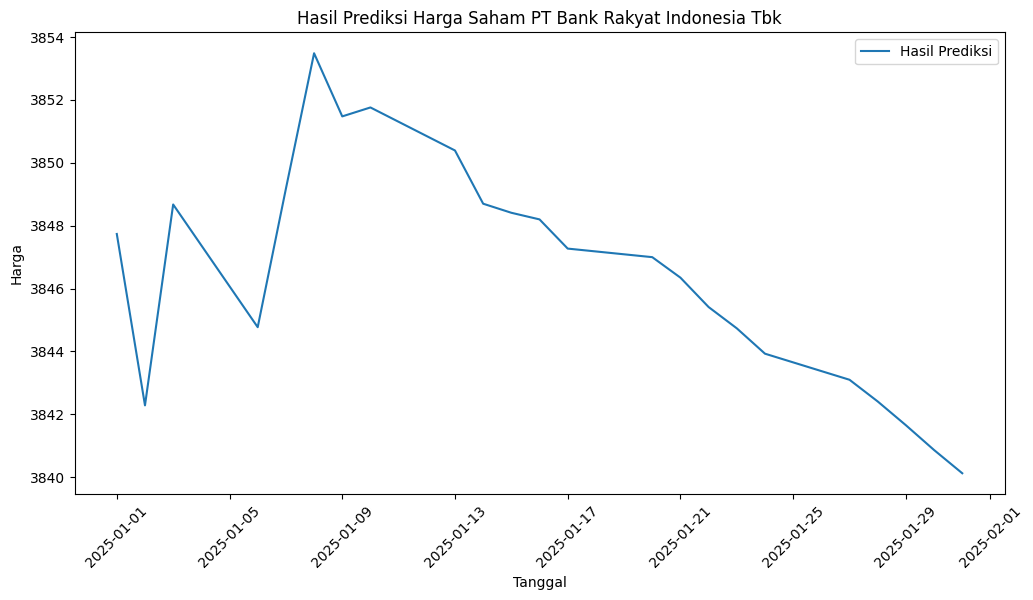

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_forecast['Date'], df_forecast['Predicted_Close'], label="Hasil Prediksi", color="C0")
plt.title("Hasil Prediksi Harga Saham PT Bank Rakyat Indonesia Tbk")
plt.xlabel("Tanggal")
plt.ylabel("Harga")
plt.legend()
plt.xticks(rotation=45)
plt.savefig('Hasil Prediksi Harga Saham PT Bank Rakyat Indonesia Tbk.png')
plt.show()